In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.options.display.max_columns=999 
plt.style.use('fivethirtyeight')

# Examining Distributions

## 1. One Categorical variable 

## Frequency Distributions 

What is your perception of your own body? Do you feel that you are overweight, underweight, or about right?

A random sample of 1,200 U.S. college students were asked this question as part of a larger survey. The following table shows part of the responses:

Here is some information that would be interesting to get from these data:

* What percentage of the sampled students fall into each category?
* How are students divided across the three body image categories? Are they equally divided? If not, do the percentages follow some other kind of pattern?

There is no way that we can answer these questions by looking at the raw data, which are in the form of a long list of 1,200 responses, and thus not very useful. However, both these questions will be easily answered once we summarize and look at the distribution of the variable Body Image (i.e., once we summarize how often each of the categories occurs).

In order to summarize the distribution of a categorical variable, we first create a table of the different values (categories) the variable takes, how many times each value occurs (count) and, more importantly, how often each value occurs (by converting the counts to percentages); this table is called a frequency distribution. Here is the frequency distribution for our example:

In [2]:
# create the dataframe 
category_list = ['About Right','OverWeight','UnderWeight']
count_list = [855, 235, 110]

body_image_distribution = pd.DataFrame(list(zip(category_list, count_list)),
                                      columns = ['Category','Count'])
body_image_distribution

,Category,Count
0,About Right,855
1,OverWeight,235
2,UnderWeight,110


In [3]:
total_observations = body_image_distribution['Count'].sum()
total_observations

1200

In [4]:
body_image_distribution['Percent'] = body_image_distribution['Count'] / total_observations * 100 
body_image_distribution

,Category,Count,Percent
0,About Right,855,71.250000
1,OverWeight,235,19.583333
2,UnderWeight,110,9.166667


### Pie And Bar Charts 

In order to visualize the numerical summaries we've obtained, we need a graphical display. There are two simple graphical displays for visualizing the distribution of categorical data:

### 1. Pie Chart 

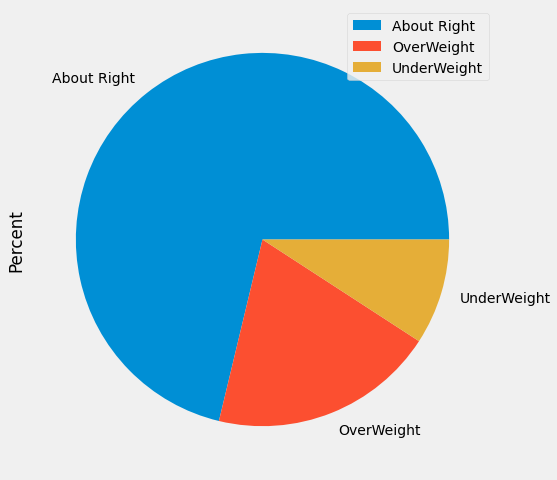

In [5]:
body_image_distribution.set_index('Category').plot.pie(y='Percent', figsize=(10,8));

### 2. Bar Chart 

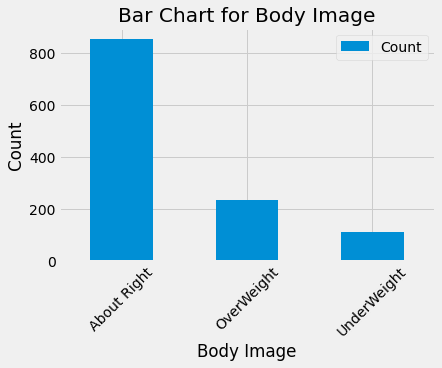

In [6]:
body_image_distribution.plot.bar(x='Category', y='Count', rot=45)
plt.title('Bar Chart for Body Image')
plt.xlabel('Body Image')
plt.ylabel('Count')
plt.show()

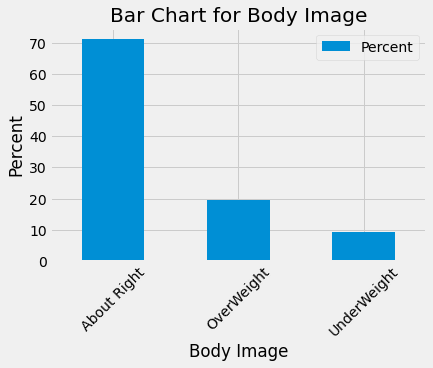

In [7]:
body_image_distribution.plot.bar(x='Category', y='Percent', rot=45)
plt.title('Bar Chart for Body Image')
plt.xlabel('Body Image')
plt.ylabel('Percent')
plt.show()

Now that we've interpreted the results, there are some other interesting questions that arise:

* Can we reliably generalize our results to the entire population of interest and conclude that a similar distribution across body image categories exists among all U.S. college students? In particular, can we make such a generalization even though our sample consisted of only 1,200 students, which is a very small fraction of the entire population?

* If we had separated our sample by gender and looked at males and females separately, would we have found a similar distribution across body image categories?
These are the types of questions that we will deal with in future sections of the course.

## Question 

The same survey that asked 1,200 U.S. college students about their body perception also asked the following question:

"With whom do you find it easiest to make friends?" (opposite sex, same sex or no difference).


In [9]:
friends = pd.read_excel('./friends.xls')

In [ ]:
friends.head()

In [ ]:
friends['Friends'].value_counts()

In [ ]:
friends['Friends'].value_counts(normalize=True)*100

In [ ]:
friends['Friends'].value_counts(normalize=True).plot.bar();

The students are NOT divided equally among the three categories. About 50% of the students find it as easy to make friends with the opposite sex as with the same sex. Among the remaining 50% of the students, the majority (36.2%) find it easier to make friends with people of the opposite sex, and the remainder (13.7%) find it easier to make friends with people of their own sex.

**The distribution of a categorical variable is summarized using:**
* Graphical display: pie chart or bar chart, supplemented by
* Numerical summaries: category counts and percentages.

## 2. One Quantitative Variable

In this section, we will explore the data collected from a quantitative variable, and learn how to describe and summarize the important features of its distribution. We will first learn how to display the distribution using graphs and then move on to discuss numerical measures.

To display data from one quantitative variable graphically, we can use either the histogram or the stemplot. (Another graph, the boxplot, will be covered in another section).

### 1. Histograms(Intervals)

The Idea is to break the range of values into intervals and count how many observations fall into each interval. 

In [ ]:
exam_grades = pd.DataFrame([88, 48, 60, 51, 57, 85, 69, 75, 97, 72, 71, 79, 65, 63, 73], columns=['scores'])
exam_grades.head()

So to break the range of values into intervals we can use the pandas cut function.

In [ ]:
# First create the bins
cut_points = [40,50,60,70,80,90,100]
labels_name = ['40-50','50-60','60-70','70-80','80-90','90-100']
exam_grades['score_category'] = pd.cut(exam_grades['scores'], bins=cut_points,labels=labels_name)
exam_grades

Now, we can use the value_counts() function to count the frequencies of each intervals.

In [ ]:
exam_grades['score_category'].value_counts().sort_index()

We can also calculate the relative frequency by using the normalize parameter. 

In [ ]:
exam_grades['score_category'].value_counts(normalize=True).sort_index()*100 

To construct the histogram, we plot the intervals on the X-axis, and show the number of observations in each interval (frequency of the interval) on the Y-axis, which is represented by the height of a rectangle located above the interval:To plot the histogram, we can use the plot.hist() function.

In [ ]:
exam_grades['scores'].plot.hist();

Q. What percentage of students earned less than a grade of 70 on the exam?

Ans - Nearly 47% of the students earned less than a grade of 70 on the exam.

### Histogram Shape - Interpreting the Histogram

Once the distribution has been displayed graphically, we can describe the overall pattern of the distribution and mention any striking deviations from that pattern. More specifically, we should consider the following features of the distribution:

![Image](img/hist1.png)

We will get a sense of the overall pattern of the data from the histogram's center, spread and shape, while outliers will highlight deviations from that pattern.

### Shape 

When describing the shape of a distribution, we should consider:

* Symmetry/skewness of the distribution.
* Peakedness (modality)—the number of peaks (modes) the distribution has.

We distinguish between:

### Symmetric Distributions

![image](img/hist2.png)
![image](img/hist3.png)

Note that all three distributions are symmetric, but are different in their modality (peakedness). The first distribution is unimodal—it has one mode (roughly at 10) around which the observations are concentrated. The second distribution is bimodal—it has two modes (roughly at 10 and 20) around which the observations are concentrated. The third distribution is kind of flat, or uniform. The distribution has no modes, or no value around which the observations are concentrated. Rather, we see that the observations are roughly uniformly distributed among the different values.

### Skewed Right Distribution

![inmage](img/hist4.png)

A distribution is called skewed right if, as in the histogram above, the right tail (larger values) is much longer than the left tail (small values). Note that in a skewed right distribution, the bulk of the observations are small/medium, with a few observations that are much larger than the rest. An example of a real-life variable that has a skewed right distribution is salary. Most people earn in the low/medium range of salaries, with a few exceptions (CEOs, professional athletes etc.) that are distributed along a large range (long "tail") of higher values.

### Skewed Left Distribution

![image](img/hist5.png)

A distribution is called skewed left if, as in the histogram above, the left tail (smaller values) is much longer than the right tail (larger values). Note that in a skewed left distribution, the bulk of the observations are medium/large, with a few observations that are much smaller than the rest. An example of a real life variable that has a skewed left distribution is age of death from natural causes (heart disease, cancer etc.). Most such deaths happen at older ages, with fewer cases happening at younger ages.

### Comments: 

1. Note that skewed distributions can also be bimodal. Here is an example. A medium size neighborhood 24-hour convenience store collected data from 537 customers on the amount of money spend in a single visit to the store. The following histogram displays the data.

Note that the overall shape of the distribution is skewed to the right with a clear mode around 25 dollar. In addition it has another (smaller) “peak” (mode) around 50-55 dollar. The majority of the customers spend around 25 dollar but there is a cluster of customers who enter the store and spend around 50-55 dollar.

2. If a distribution has more than two modes, we say that the distribution is multimodal.

Recall our grades example below. As you can see from the histogram, the grades distribution is roughly symmetric.

![image](img/hist0.png)

## Histogram - Center, Spread & Outliers

### Center

The center of the distribution is its midpoint—the value that divides the distribution so that approximately half the observations take smaller values, and approximately half the observations take larger values. Note that from looking at the histogram we can get only a rough estimate for the center of the distribution. (More exact ways of finding measures of center will be discussed in the next section.)

Recall our grades example:

![image](img/hist0.png)

As you can see from the histogram, the center of the grades distribution is roughly 70 (7 students scored below 70, and 8 students scored above 70).

### Spread

The spread (also called variability) of the distribution can be described by the approximate range covered by the data. From looking at the histogram, we can approximate the smallest observation (min), and the largest observation (max), and thus approximate the range. (More exact ways of finding measures of spread will be discussed in the next section.)

In our example:

* approximate min: 45 (the middle of the lowest interval of scores)
* approximate max: 95 (the middle of the highest interval of scores)
* approximate range: 95-45=50

### Outliers 

Outliers are observations that fall outside the overall pattern. For example, the following histogram represents a distribution that has a high probable outlier:


![image](img/hist7.png)

### Example - Best Actress Oscar Winners

To provide an example of a histogram applied to actual data, we will look at the ages of Best Actress Oscar winners from 1970 to 2013. 

In [ ]:
actress = pd.read_csv('./actress_2013.txt')

In [ ]:
actress.head()

In [ ]:
# create the Histogram
actress['Age'].plot.hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Best Actress Oscar Winners 1970 to 2013')
plt.show()

We will now summarize the main features of the distribution of ages as it appears from the histogram:

**Shape:** The distribution of ages is skewed right. We have a concentration of data among the younger ages and a long tail to the right. The vast majority of the "best actress" awards are given to young actresses, with very few awards given to actresses who are older.

**Center:** The data seem to be centered around 34 or 35 years old. Note that this implies that roughly half the awards are given to actresses who are less than 34 years old.

**Spread:** The data range from about 20 to about 80, so the approximate range equals 80 - 20 = 60.

**Outliers:** There seem to be two probable outliers to the far right and possibly three around 62 years old.

You can see how informative it is to know "what to look at" in a histogram. If there is one conclusion that we can make here, it is that Hollywood likes its actresses young.

### Let's Summarize 

* The histogram is a graphical display of the distribution of a quantitative variable. It plots the number (count) of observations that fall in intervals of values.
* When examining the distribution of a quantitative variable, one should describe the overall pattern of the data (shape, center, spread), and any deviations from the pattern (outliers).
* When describing the shape of a distribution, one should consider:
    * Symmetry/skewness of the distribution
    * Peakedness (modality)—the number of peaks (modes) the distribution has.
Not all distributions have a simple, recognizable shape.
* Outliers are data points that fall outside the overall pattern of the distribution and need further research before continuing the analysis.
* It is always important to interpret what the features of the distribution (as they appear in the histogram) mean in the context of the data.

## Exercise 

We will use the Best Actor Oscar winners (1970-2013) to learn how to create a histogram using a python, and practice what we've learned about describing the histogram.

In [ ]:
actor = pd.read_excel('./actor_2013.xls')

In [ ]:
actor.head()

In [ ]:
actor['Age'].plot.hist();

* **Shape:** the distribution is skewed right. This means that most actors receive the best acting Oscar at a relatively younger age (before age 48), and fewer at an older age. 
* **Center:** The distribution seems to be centered at around 42-43. This means that about half the actors are 42 or younger when they receive the Oscar, and about half are older.
* **Spread:** The age distribution ranges from about 30 to about 75. The entire dataset is covered, then, by a range of 45 years. It should be noted, though, that there is one high outlier at around age 75, and the rest of the data ranges only from 30 to 60. 
* **Outliers:** As mentioned above, there is one high outlier at around age 75.